### Module Imports


In [5]:
from load_clean_data import load_clean_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

 Load and Clean MovieData.csv
 

In [2]:
movie_data = load_clean_data()

In [6]:
# function to repeat graph
def data_bar_graph(data,col):
    avg_ = movie_data.groupby(col).agg('mean').reset_index().sort_values('profit')
    fig, ax = plt.subplots(figsize=(7,7))
    sns.barplot(y=col, x='profit', data=data,  order=avg_[col][-5:], color='steelblue')
    ax.set(ylabel=col.title(), xlabel='Profit')

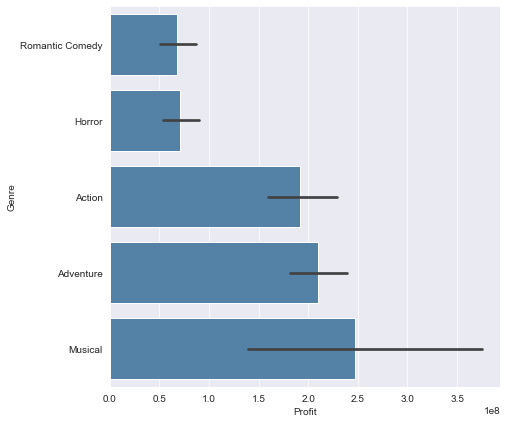

In [7]:
data_bar_graph(movie_data,'genre')

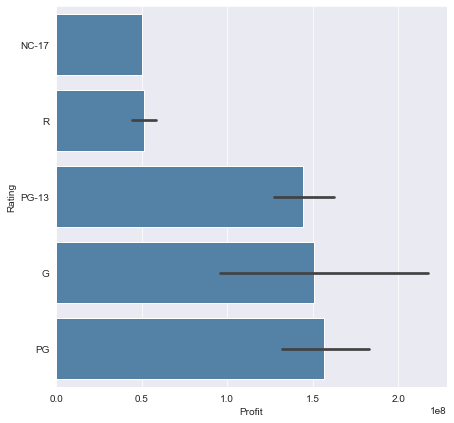

In [8]:
data_bar_graph(movie_data,'rating')

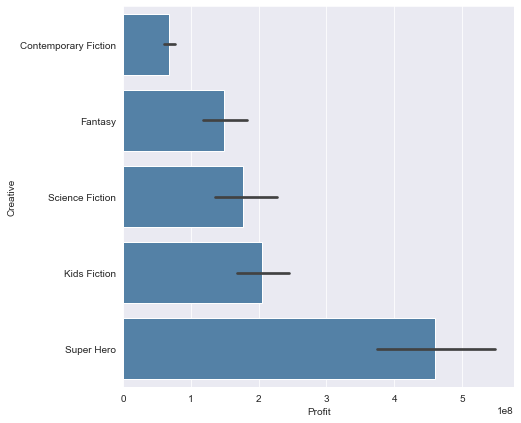

In [9]:
data_bar_graph(movie_data,'creative')

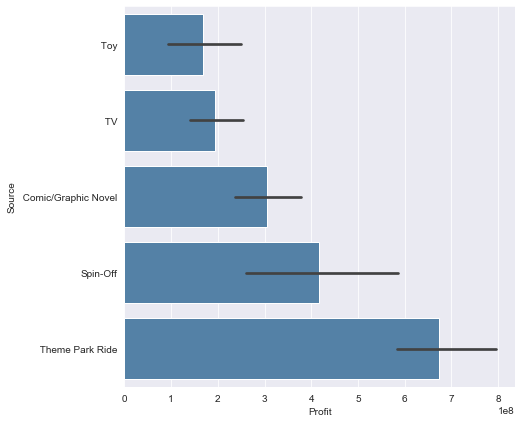

In [12]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
data_bar_graph(movie_data,'source')

In [ ]:
# data_bar_graph(movie_data,'genre')